In [1]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, ConfusionMatrixDisplay

import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.subplots import make_subplots


from sys import platform
if platform == "linux" or platform == "linux2":
    # linux
    path='/home/vedant/projects/'
elif platform == "darwin":
    # OS X
    path='/Users/vedant/Desktop/Programming/'

## Loading feature file 
(ignoring vggish features for this)

In [10]:
cols=['video_id', 'start_time', 'mid_ts', 'label', 'average_zcr',
       'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std',
       'centroid_mean','centroid_std',
       'contrast_mean','contrast_std',
       'flatness_mean','flatness_std',
       'rolloff_mean','rolloff_std','rms_mean','rms_std','vggish']
       
d=np.load(path+'ScreamDetection/resources/working_data/vocal_only_features.npy',allow_pickle=True)
df = pd.DataFrame(d,columns=cols)

lut = pd.read_csv(path+'/ScreamDetection/resources/working_data/dataset/lookup_new.csv')

df.drop('vggish',axis=1,inplace=True)
df


,video_id,start_time,mid_ts,label,average_zcr,zcr_stddev,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,...,centroid_mean,centroid_std,contrast_mean,contrast_std,flatness_mean,flatness_std,rolloff_mean,rolloff_std,rms_mean,rms_std
0,4600fGWcn9o,0.0,0.5,no_vocals,0.413911,0.135739,-910.97852,-4.489804,3.662691,20.520969,...,9023.551057,1173.744781,20.477736,9.532318,0.005914,0.007738,12384.809402,1790.229532,0.000928,0.0018
1,4600fGWcn9o,0.5,1.0,no_vocals,0.463138,0.057878,-958.326754,1.358988,14.32918,16.86865,...,9417.494647,480.986578,17.26242,7.490509,0.015151,0.014663,14221.071862,2158.024343,0.000076,0.000076
2,4600fGWcn9o,1.0,1.5,no_vocals,0.330802,0.166034,-841.041119,34.499265,40.474193,34.660842,...,7425.704469,2815.185194,18.936156,9.117977,0.014976,0.016723,12100.175108,4959.018093,0.002317,0.004231
3,4600fGWcn9o,1.5,2.0,no_vocals,0.218801,0.148379,-831.198029,41.972199,46.385542,43.636586,...,6211.300253,2699.242721,20.347328,8.963229,0.015365,0.018518,10531.221377,4624.52255,0.002362,0.004209
4,4600fGWcn9o,2.0,2.5,no_vocals,0.299586,0.12941,-933.987743,3.512773,11.661185,30.279823,...,8029.167551,2115.241821,17.468335,7.318396,0.027085,0.017076,13281.778691,3308.719718,0.000088,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33815,0m5fIHHfJTw,217.5,218.0,no_vocals,0.07455,0.084489,-922.729006,62.609265,33.896902,3.503728,...,4722.911408,2317.088935,18.939234,7.718237,0.0087,0.011026,10157.731681,5785.76274,0.00016,0.000148
33816,0m5fIHHfJTw,218.0,218.5,no_vocals,0.189779,0.116384,-960.845486,21.400309,12.859817,5.353441,...,7736.76259,1864.475628,16.893186,6.614043,0.026841,0.014518,16144.209658,2793.384129,0.000042,0.000046
33817,0m5fIHHfJTw,218.5,219.0,no_vocals,0.219727,0.065566,-958.687984,8.413832,-13.006838,-8.020873,...,8436.726791,725.480073,16.018581,6.094301,0.043117,0.009215,16881.783742,890.961715,0.000019,0.0
33818,0m5fIHHfJTw,219.0,219.5,no_vocals,0.142589,0.074068,-978.072336,10.292308,-25.188987,-11.107294,...,6377.417625,3061.128242,12.971573,7.580701,0.228489,0.366415,13138.224003,6270.95536,0.000015,0.000007


## Mapping annotations into scream, sing and no vocal:
0 = sing   
1 = scream  
2 = no vocal  

In [11]:
feature_df=df
mapping=[]
for index,row in feature_df.iterrows():
    if row['label'] == 'clean':
        mapping.append(0)
    if row['label'] == 'highfry':
        mapping.append(1)
    if row['label'] == 'layered':
        mapping.append(1)
    if row['label'] == 'lowfry':
        mapping.append(1)
    if row['label'] == 'midfry':
        mapping.append(1)
    if row['label'] == 'no_vocals':
        mapping.append(2)

feature_df.insert(4,'label_mapped',mapping)

## Undersampling data to balance out classes

In [12]:
cols=['video_id', 'start_time', 'mid_ts', 'label', 'label_mapped',
       'average_zcr', 'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std', 'centroid_mean', 'centroid_std',
       'contrast_mean', 'contrast_std', 'flatness_mean', 'flatness_std',
       'rolloff_mean', 'rolloff_std', 'rms_mean', 'rms_std']
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='not minority',random_state=0)
from collections import Counter
X = feature_df.to_numpy()
y=feature_df[['label_mapped']].to_numpy()

X_under, y_under = undersample.fit_resample(X, y)

undersampled_data = pd.DataFrame(X_under,columns=cols)
undersampled_data['label_mapped'] = y_under
#print(undersampled_data)

## Dividing into train-test-validation split based on band name
Done this way to avoid having too much vocal similarity between train and test sets

In [13]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.2, n_splits=2, random_state = 42).split(lut, groups=lut['band_name']))

train = lut.iloc[train_inds]
test = lut.iloc[test_inds]

train_ids = train['video_id'].to_numpy()
test_ids = test['video_id'].to_numpy()

#df_final = df
df_final = undersampled_data
train = df_final[df_final.video_id.isin(train_ids)]
test = df_final[df_final.video_id.isin(test_ids)]

# DIVIDING INTO X AND Y, AND ONE HOT ENCODING THE CLASSES
features=['average_zcr', 'zcr_stddev', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc1_std', 'mfcc2_std', 'mfcc3_std', 'mfcc4_std',
       'mfcc5_std', 'mfcc6_std', 'mfcc7_std', 'mfcc8_std', 'mfcc9_std',
       'mfcc10_std', 'mfcc11_std', 'mfcc12_std', 'mfcc13_std',
       'delta_mfcc1_mean', 'delta_mfcc2_mean', 'delta_mfcc3_mean',
       'delta_mfcc4_mean', 'delta_mfcc5_mean', 'delta_mfcc6_mean',
       'delta_mfcc7_mean', 'delta_mfcc8_mean', 'delta_mfcc9_mean',
       'delta_mfcc10_mean', 'delta_mfcc11_mean', 'delta_mfcc12_mean',
       'delta_mfcc13_mean', 'delta_mfcc1_std', 'delta_mfcc2_std',
       'delta_mfcc3_std', 'delta_mfcc4_std', 'delta_mfcc5_std',
       'delta_mfcc6_std', 'delta_mfcc7_std', 'delta_mfcc8_std',
       'delta_mfcc9_std', 'delta_mfcc10_std', 'delta_mfcc11_std',
       'delta_mfcc12_std', 'delta_mfcc13_std', 'centroid_mean', 'centroid_std',
       'contrast_mean', 'contrast_std', 'flatness_mean', 'flatness_std',
       'rolloff_mean', 'rolloff_std', 'rms_mean', 'rms_std']
x_train = train[features].to_numpy()
y_train_hot = to_categorical(train['label_mapped'].to_numpy())

x_test1 = test[features].to_numpy()
y_test_hot1 = to_categorical(test['label_mapped'].to_numpy())

#CREATING VALIDATION SPLIT
x_test,x_valid,y_test_hot,y_valid=train_test_split(x_test1,y_test_hot1,test_size=0.2, random_state=42)

## Normalizing feature vectors

In [14]:
X_train=x_train
X_test=x_test

X_train=np.array(X_train)
X_test=np.array(X_test)

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_valid = scaler.transform(x_valid)

X_train = X_train.reshape(-1, 64)
X_test = X_test.reshape(-1, 64)
X_valid = X_valid.reshape(-1, 64)

In [31]:
X_train=np.load(f'{path}ScreamDetection/resources/working_data/x_train.npy',allow_pickle = True)
y_train_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_train_hot.npy',allow_pickle = True)

X_test=np.load(f'{path}ScreamDetection/resources/working_data/x_test.npy',allow_pickle = True)
y_test_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_test_hot.npy',allow_pickle = True)

X_valid=np.load(f'{path}ScreamDetection/resources/working_data/x_valid.npy',allow_pickle = True)
y_valid_hot=np.load(f'{path}ScreamDetection/resources/working_data/y_valid_hot.npy',allow_pickle = True)

In [28]:
X_train

array([[-0.67227689, -0.83764206,  0.95605425, ..., -1.13408584,
         2.51292299,  0.30132673],
       [-0.53445576, -0.90066013,  0.85424283, ..., -1.32362495,
         2.23518377,  0.40232132],
       [-0.58012748, -0.84084354,  0.93480736, ..., -1.05442288,
         2.30502791,  0.65635949],
       ...,
       [ 2.17119063,  1.89104303, -1.71368533, ...,  1.85173928,
        -1.20432884, -1.19808411],
       [ 1.3409325 ,  0.67419403, -1.39004879, ..., -1.1136106 ,
        -1.19159174, -1.19731622],
       [ 1.53710597,  1.99293676, -0.0371693 , ...,  0.05509877,
        -0.88542954, -0.15669633]])

## Model training function

In [29]:
import pandas as pd
def train_models(X_train,y_train_hot,X_test,y_test_hot,epochs,batch_size,lr,layer1_nodes,optimiser,loss,verbose):
    model = Sequential()
    input_shape = (64,1)#(128, 87, 1)
    # model.add(Dense(128, activation='relu'))
    # model.add(Dense(6, activation='softmax'))
    model.add(Dense(layer1_nodes,input_dim=64, activation='relu'))
    # model.add(Dense(32, activation='relu'))
    # model.add(Dense(16, activation='relu'))
    # model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    if optimiser=='adadelta':
        optim=keras.optimizers.Adadelta(learning_rate=lr)
    if optimiser == 'adam':
        optim=keras.optimizers.Adam(learning_rate=lr)

    if loss == 'crossentropy':
        loss_fn = keras.losses.categorical_crossentropy

    model.compile(loss=loss_fn,
                optimizer=optim,
                metrics=['accuracy'])
    model.build(input_shape)
    model.summary()
    # fit the model
    history=model.fit(X_train, y_train_hot,
            batch_size=batch_size,
            epochs=epochs,
            verbose=verbose,
            validation_data=(X_test, y_test_hot))
    training_loss=history.history['loss']
    validation_loss=history.history['val_loss']
    training_acc=history.history['accuracy']
    validation_acc=history.history['val_accuracy']
    df=pd.DataFrame()
    df['training_loss'] = training_loss
    df['validation_loss'] = validation_loss
    df['training_acc'] = training_acc
    df['validation_acc'] = validation_acc
    lr_str=str(lr).replace('.','_')
    model_name=f'fcnn_layer1-{layer1_nodes}_batch-{batch_size}_epochs-{epochs}_lr-{lr_str}'
    
    model.save(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}')
    df.to_csv(f'{path}ScreamDetection/CNN/trained_models/fcnn/{model_name}.csv')

    trace1 = go.Scatter(
    x=df.index,
        y=df['training_loss'],
        name='Training Loss'
    )
    trace2 = go.Scatter(
        x=df.index,
        y=df['validation_loss'],
        name='Validation Loss'
    )
    trace3 = go.Scatter(
        x=df.index,
        y=df['training_acc'],
        name='Training Accuracy',
        yaxis='y2'
    )
    trace4 = go.Scatter(
        x=df.index,
        y=df['validation_acc'],
        name='Validation Accuracy',
        yaxis='y2'
    )

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.add_trace(trace3,secondary_y=True)
    fig.add_trace(trace4,secondary_y=True)
    fig.show()
    return model

## Best results with FCNN

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 771       
Total params: 17,411
Trainable params: 17,411
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Assets written to: /Users/vedant/Desktop/Programming/ScreamDetection/CNN/trained_models/fcnn/fcnn_layer1-256_batch-1024_epochs-500_lr-5e-05/assets


Overall Accuracy Score: 0.8442211055276382
Class-wise accuracy:
[0.96551724 0.         0.03448276]
[0.17171717 0.76767677 0.06060606]
[0.02816901 0.07042254 0.90140845]
Macro Accuracy: 0.8118082454978536
Confusion Matrix:


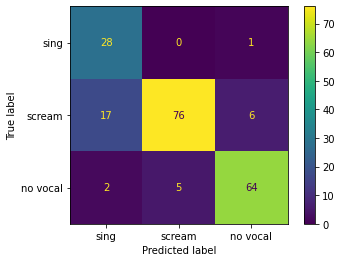

In [32]:
model=train_models(X_train,y_train_hot,X_test,y_test_hot,epochs=500,batch_size=1024,lr=0.00005,layer1_nodes=256,optimiser='adam',loss='crossentropy',verbose=0)

y_pred=model.predict(X_valid)
y_pred[np.where(y_pred==np.max(y_pred))] = 1


predicted=np.argmax(y_pred, axis=1)
ground_truth=np.argmax(y_valid_hot, axis=1)

cm=confusion_matrix(ground_truth,predicted)
score=precision_score(ground_truth,predicted, average='macro')
acc = accuracy_score(ground_truth,predicted)


print(f"Overall Accuracy Score: {acc}")
print("Class-wise accuracy:")
for row in cm:
    print(row/row.sum())
print(f"Macro Accuracy: {score}")

print("Confusion Matrix:")
# print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['sing','scream','no vocal']).plot()
